# Taller 5
Alumno: 
- José Nicolas Castillo Rojas
- Agustin Brito
- Pablo Silva

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy.matlib import repmat
import scipy.ndimage as ndi
import statistics as sts

## Parte 1
Utilice el siguiente código para abrir su imagen (no lo modifique). La imagen rombo.png se 
encuentra en la intranet junto a este enunciado. (observación. Incluya usted las bibliotecas cv2 
y numpy no indicadas en el código)

In [2]:
img = cv2.imread("rombo.png") 
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
gray_norm = cv2.normalize(gray.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX) 
 
noise = np.random.random(gray.shape)*0.3 
output = gray_norm + noise  


(-0.5, 825.5, 661.5, -0.5)

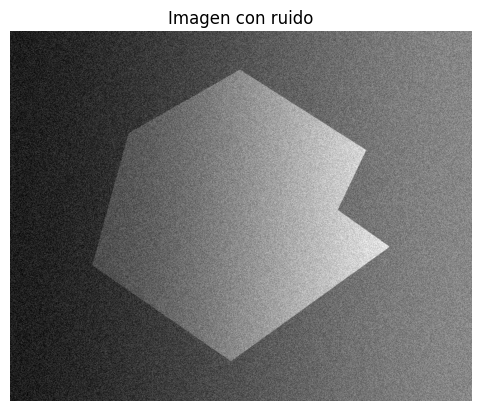

In [3]:
plt.title("Imagen con ruido")
plt.imshow(output, cmap='gray')
plt.axis('off')

## Parte 2
Utilice un filtro apropiado para reducir el ruido generado en la variable output. Usted tiene 
total libertad de emplear el filtro más adecuado con el cual pueda reducir el ruido.

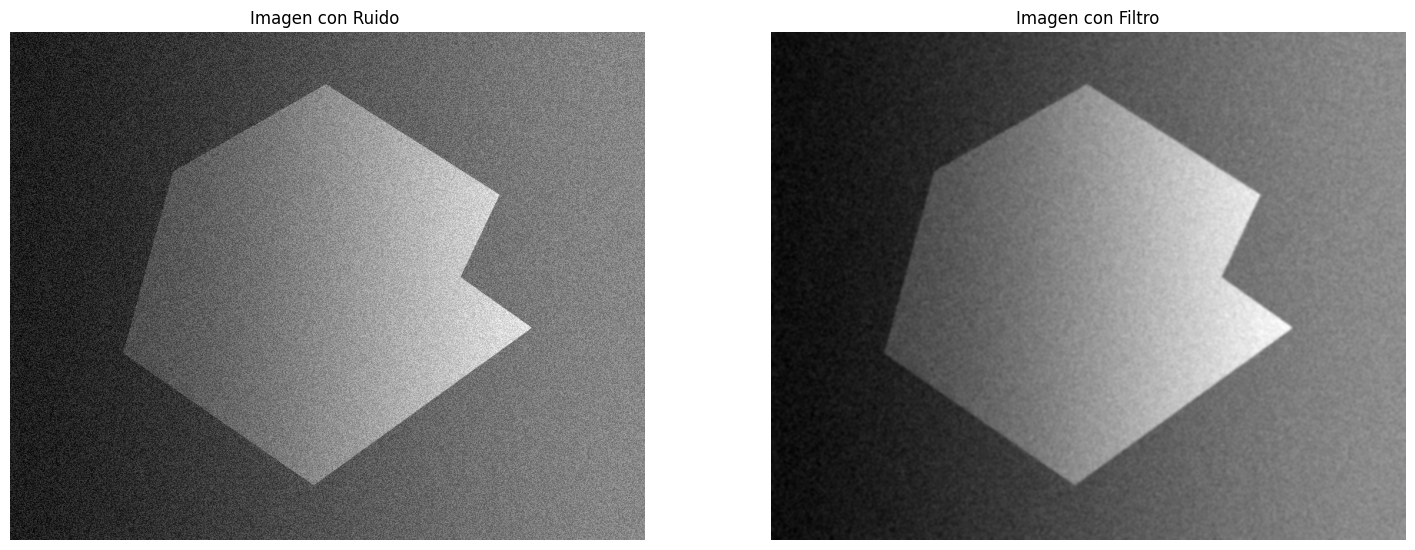

In [4]:
def filtro_promedio(subimagen):
    return np.mean(subimagen)

rombo_filtado= cv2.GaussianBlur(output, (7, 7), 0)#ndi.generic_filter(output, filtro_promedio, [3,3])


plt.figure(figsize=(18,10))
plt.subplot(1,2,1),plt.imshow(output, cmap="gray"),plt.title("Imagen con Ruido "),plt.axis('off')
plt.subplot(1,2,2),plt.imshow(rombo_filtado, cmap="gray"),plt.title("Imagen con Filtro"),plt.axis('off')

plt.show()

# Ecualiza el histograma
#img_ecualizada = cv2.equalizeHist(rombo_filtado)
#plt.figure(figsize=(18,10))
#plt.subplot(1,2,1),plt.imshow(output, cmap="gray"),plt.title("Imagen con Filtro"),plt.axis('off')
#plt.subplot(1,2,2),plt.imshow(img_ecualizada , cmap="gray"),plt.title("Imagen con Filtro-Ecualizada"),plt.axis('off')
#plt.show()


## Parte 3
Determine los bordes del rombo tomando el resultado del paso 2. Utilice alguna de las técnicas 
vistas en clases para generar bordes. Puede experimentar modificar los parámetros. Muestre 
evidencia de dicha experimentación.

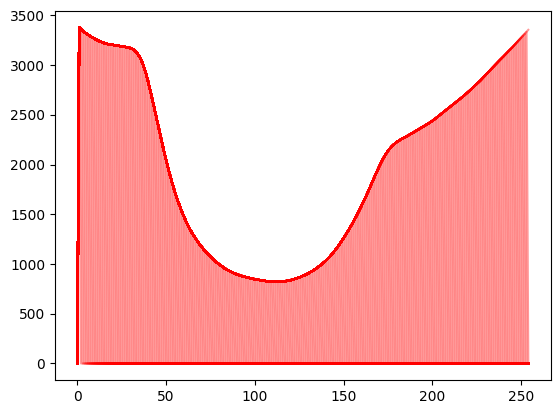

el nivel es:111


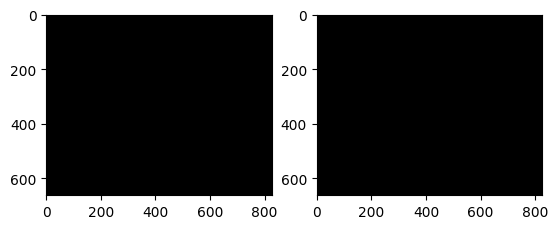

In [11]:

def otsu(img):
    
    bns= np.linspace(0,255,256,dtype='uint8')
    h, bins = np.histogram(img, bins=bns)
    P = h/np.sum(h)
    
    q1  = np.zeros([255])
    q2  = np.zeros([255])
    mu1 = np.zeros([255])
    mu2 = np.zeros([255])
    va1 = np.zeros([255])
    va2 = np.zeros([255])
    #plt.figure()

    for t in range(1,255):
        iL= np.linspace(0,t-1,t,dtype='uint8')
        iR= np.linspace(t,254,255-t,dtype='uint8')
        
        q1[t]=np.sum(P[iL])+0.000001
        q2[t]=np.sum(P[iR])+0.000001
        mu1[t]= np.sum(iL*P[iL]/q1[t])
        mu2[t]= np.sum(iR*P[iR]/q2[t])

        va1[t]= np.sum((iL-mu1[t])**2* (P[iL]/ q1[t]))
        va2[t]= np.sum((iR-mu2[t])**2* (P[iR]/ q2[t]))
        plt.plot(q1*va1 + q2*va2, color='red', alpha=0.4)
        
        #plt.pause(0.1)
        #plt.draw()

    plt.show()
    vartotal= q1*va1 + q2*va2
    level=np.argmin(vartotal[1:255])
    return level


level= otsu(rombo_filtado)
print(f'el nivel es:{level}')

ret, bin = cv2.threshold(img, level, 255,type=cv2.THRESH_BINARY)
bw = (img > level)*1

fig, ax= plt.subplots(nrows=1, ncols=2)
ax[0].imshow(bin, cmap='gray')
ax[1].imshow(bw, cmap='gray')
plt.show()

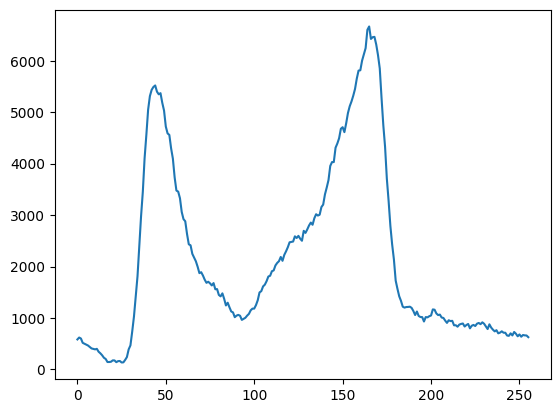

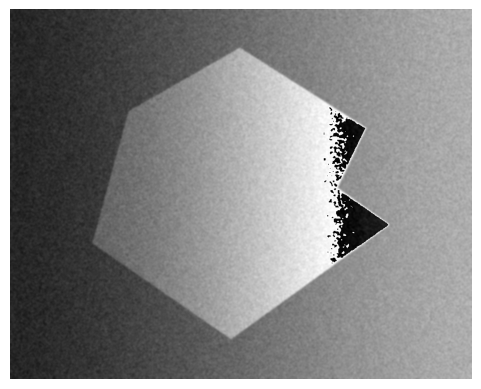

In [5]:
rombo_filtado=(rombo_filtado * 255).astype(np.uint8)
hist = cv2.calcHist([rombo_filtado], [0], None, [256], [0, 256])
plt.plot(hist)
plt.show()
plt.imshow(rombo_filtado, cmap='gray')
plt.axis('off')
plt.show()

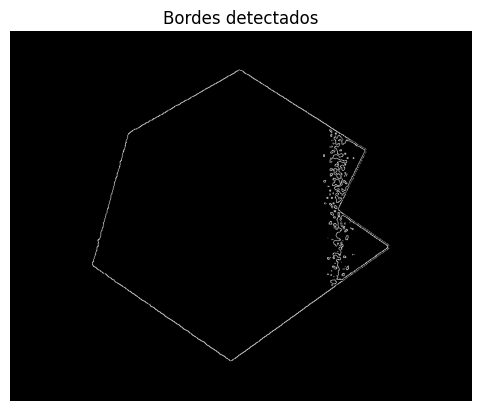

In [6]:
edges = cv2.Canny(rombo_filtado , 50, 160)
plt.title("Bordes detectados")
plt.imshow(edges, cmap='gray')
plt.axis('off')
plt.show()

## Parte 4
Utilice los algoritmos morfológicos vistos en clases para unir los bordes del paso 3. Se 
recomienda que realice una clausura con estructuras de distinto tamaño, es decir, que la 
estructura para erosionar sea menor a la dilatación con un kernel definido por usted.

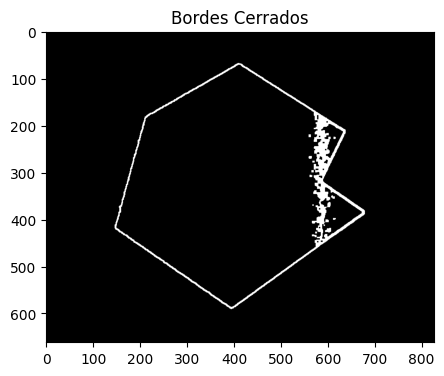

In [7]:
# Definir los elementos estructurantes
kernel_dilatado = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
kernel_erode = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# Aplicar cierre morfológico
dilated = cv2.dilate(edges, kernel_dilatado)
cerrada = cv2.erode(dilated, kernel_erode)

# Mostrar los bordes cerrados
plt.figure(figsize=(5, 5))
plt.title('Bordes Cerrados')
plt.imshow(cerrada , cmap='gray')
plt.show()

## Parte 5
Utilice la función cv2.floodFill  para cerrar la región del paso 4. Recuerde que dicha 
región debe estar cerrada para que el algoritmo rellene la región.  

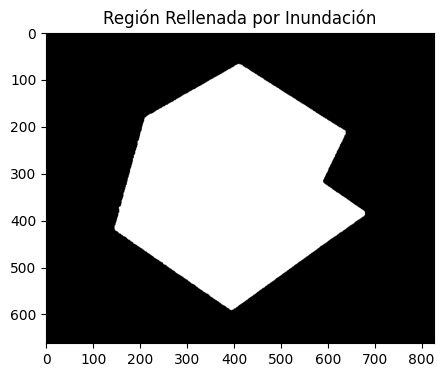

In [8]:
# Copiar los bordes cerrados para el relleno por inundación
flood_filled = cerrada.copy()
h, w = flood_filled.shape
mask = np.zeros((h+2, w+2), np.uint8)

# Relleno por inundación
cv2.floodFill(flood_filled, mask, (0, 0), 255)

# Invertir la imagen rellena por inundación
flood_filled_inv = cv2.bitwise_not(flood_filled)

# Combinar los bordes cerrados y la imagen invertida rellena por inundación
final_filled = cerrada | flood_filled_inv

# Mostrar la región rellenada
plt.figure(figsize=(5, 5))
plt.title('Región Rellenada por Inundación')
plt.imshow(final_filled, cmap='gray')
plt.show()

## Parte 6
Utilice la transformada de Hough para encontrar las principales líneas de la región obtenidas 
en el paso 3 (bordes del rombo). 

In [9]:
import numpy as np
from skimage.transform import hough_line, hough_line_peaks
import matplotlib.pyplot as plt
from matplotlib import cm

#programa ppal
BW = cv2.Canny(edges,10,150,apertureSize = 3)

angulos = np.linspace(-np.pi/2, np.pi/2, 360)
h, theta, d = hough_line(BW, theta=angulos)

# Mapa de acumulación
fig = plt.figure()
plt.imshow(np.log(1 + h),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.hot,aspect=1/25)
plt.xlabel('Angulo')
plt.ylabel('Acumulador')
plt.show()

fig = plt.figure()
plt.imshow(edges, cmap='gray')
eje_x = np.array((0, BW.shape[1]))

valores_maximos= hough_line_peaks(h, theta, d, threshold=80)

for accum, theta, rho in zip(*valores_maximos):  #el * separa un arreglo
    y0 = (rho - eje_x[0] * np.cos(theta)) / np.sin(theta)
    y1 = (rho - eje_x[1] * np.cos(theta)) / np.sin(theta)
    plt.plot(eje_x, (y0, y1), '-r')


plt.xlim(eje_x)
plt.ylim((BW.shape[0], 0))
plt.title('Lineas de mapa de Hough')

ModuleNotFoundError: No module named 'skimage'